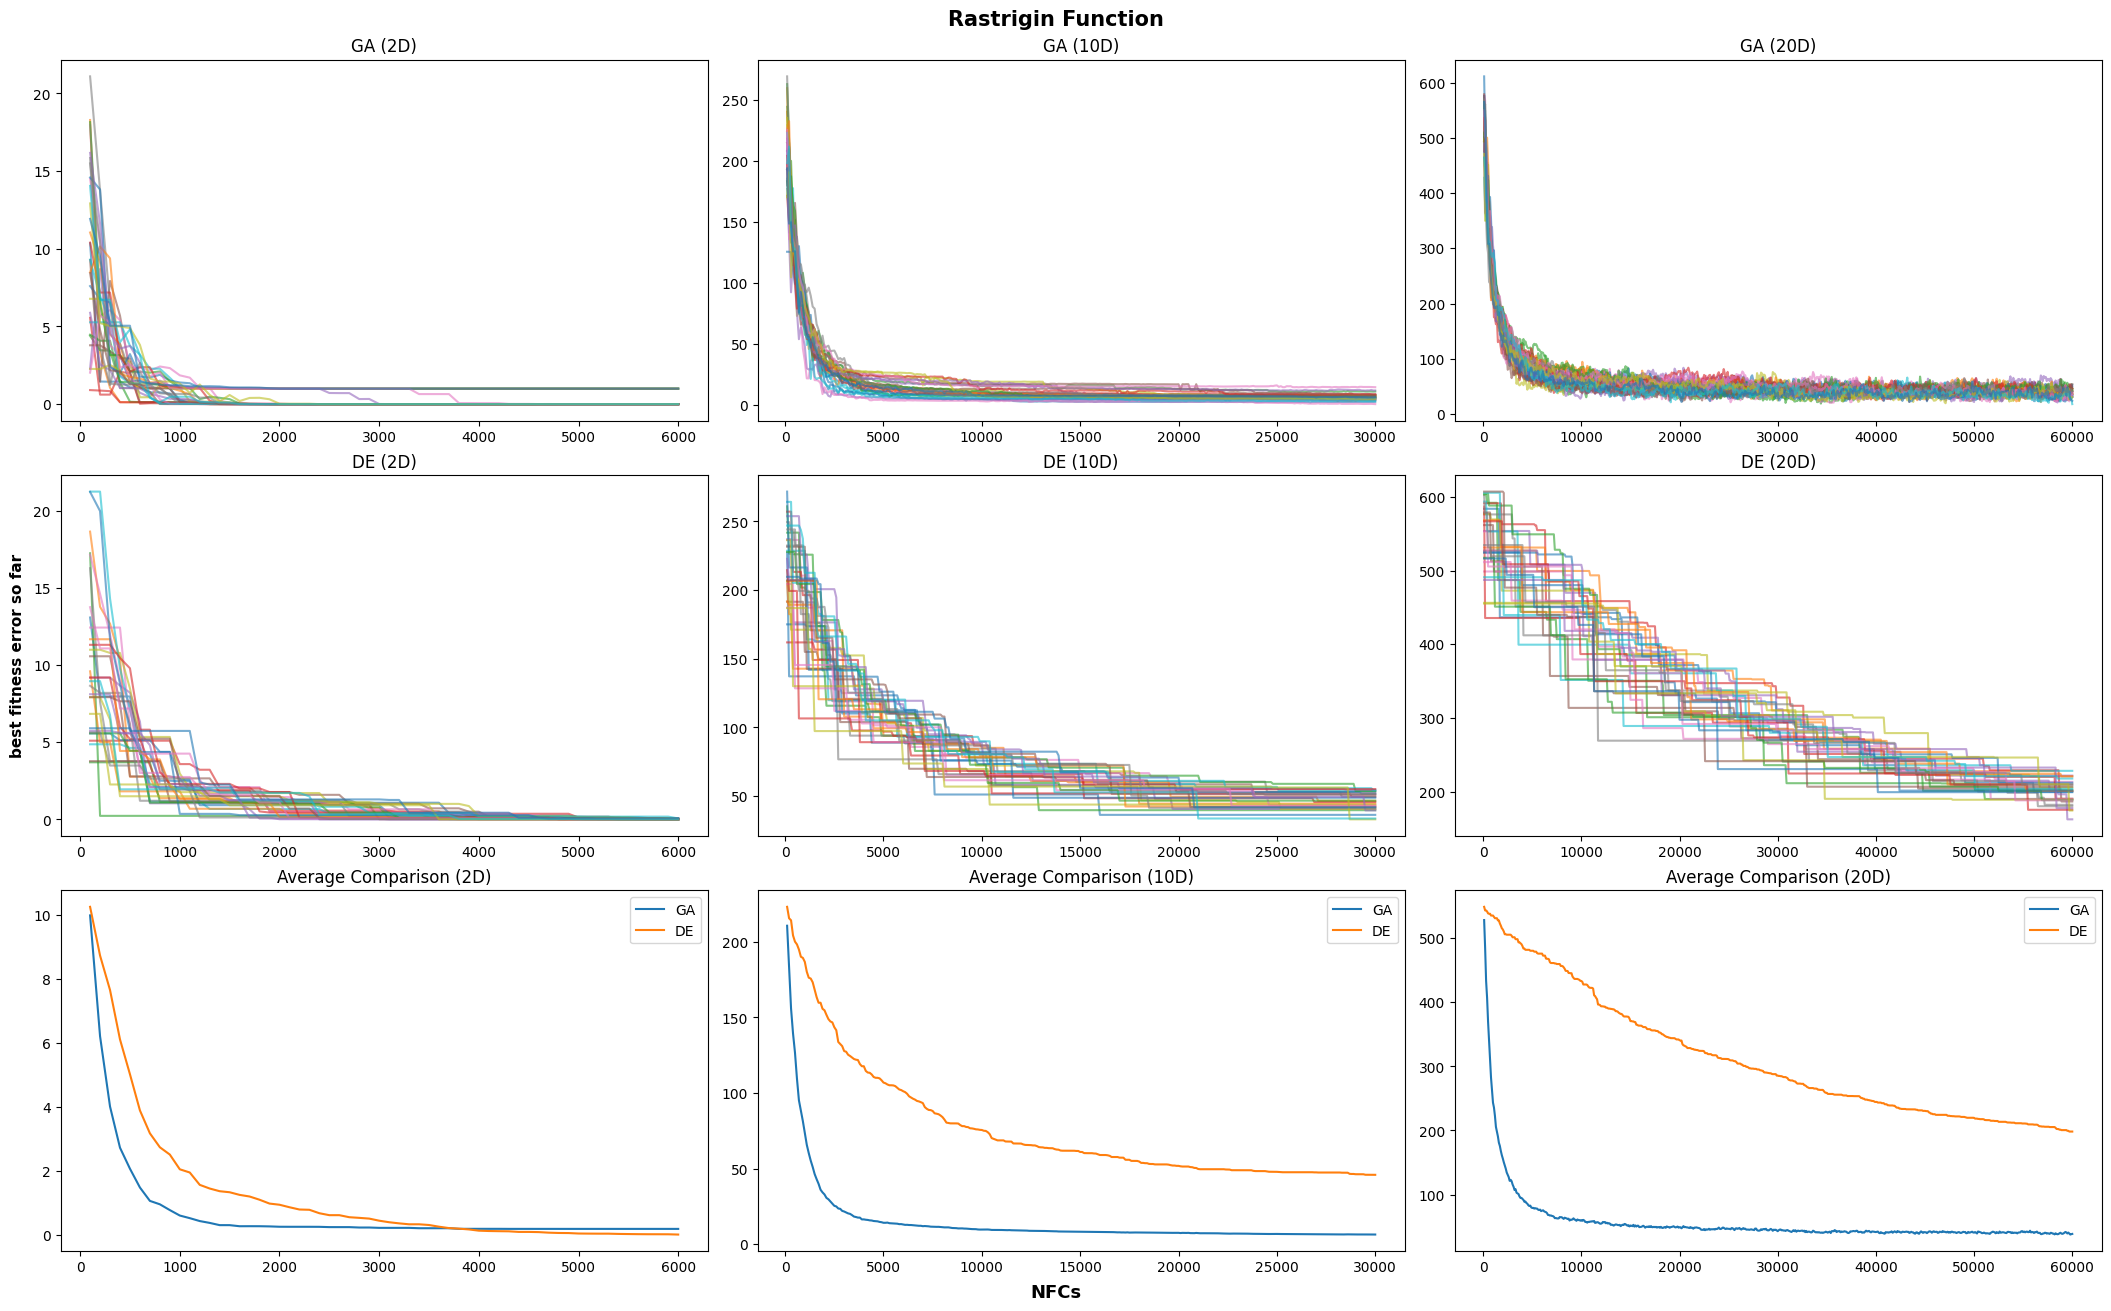

Rastrigin Function (GA 2D) ----- best: 0.0, mean: 0.19, std: 0.39
Rastrigin Function (DE 2D) ----- best: 0.0, mean: 0.02, std: 0.02
Rastrigin Function (GA 10D) ----- best: 0.35, mean: 6.03, std: 2.59
Rastrigin Function (DE 10D) ----- best: 33.02, mean: 45.86, std: 6.2
Rastrigin Function (GA 20D) ----- best: 17.81, mean: 23.45, std: 2.81
Rastrigin Function (DE 20D) ----- best: 162.29, mean: 198.26, std: 15.79
----------------------------------------------------------------------------------------------------------------------
Rastrigin Function (GA 2D) ----- best: 0.0, solution: [0. 0.]
Rastrigin Function (DE 2D) ----- best: 0.0, solution: [-0.00019654 -0.00013799]
Rastrigin Function (GA 10D) ----- best: 0.35, solution: [-0.00061035 -0.00762939 -0.00732422  0.00671387 -0.00091553  0.01922607
  0.01831055  0.02075195  0.01525879  0.01525879]
Rastrigin Function (DE 10D) ----- best: 33.02, solution: [ 1.06901511 -1.02865248  0.11893436 -1.06657696 -1.10192047 -1.88650173
  1.08871333  0.91

In [1]:
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from Benchmark_Functions import high_conditioned_elliptic,bent_cigar,discus,rosen_brock,ackley,weierstrass,griewank,rastrigin
from DE import run_de
from GA import run_ga
import numpy as np

def run_func(objective, name):
    dims = [2, 10, 20]
    list_ga_scores = []
    list_de_scores = []
    list_ga_population = []
    list_de_population = []

    runs_ga_2d_scores = []
    runs_de_2d_scores = []
    runs_ga_10d_scores = []
    runs_de_10d_scores = []
    runs_ga_20d_scores = []
    runs_de_20d_scores = []
    runs_ga_2d_population = []
    runs_de_2d_population = []
    runs_ga_10d_population = []
    runs_de_10d_population = []
    runs_ga_20d_population = []
    runs_de_20d_population = []
    for i in range(31):
        for dim in dims:
            bounds = [(-10, 10) for i in range(dim)]
            # define the total iterations
            n_iter = 30 * dim
            # define the population size
            n_pop = 100
            # crossover rate
            r_cross = 0.9

            # bits per variable
            n_bits = 16
            # mutation rate
            r_mut = 0.01
            # perform the genetic algorithm search
            evolution_ga_scores,evolution_ga_population = run_ga(objective, bounds, n_bits, n_pop, r_cross, r_mut, n_iter)

            # define scale factor for mutation
            F = 0.8
            evolution_de_scores,evolution_de_population = run_de(objective, bounds, n_pop, r_cross, F, n_iter)

            if dim == 2:
                runs_ga_2d_scores.append(evolution_ga_scores)
                runs_de_2d_scores.append(evolution_de_scores)
                runs_ga_2d_population.append(evolution_ga_population)
                runs_de_2d_population.append(evolution_de_population)
            elif dim == 10:
                runs_ga_10d_scores.append(evolution_ga_scores)
                runs_de_10d_scores.append(evolution_de_scores)
                runs_ga_10d_population.append(evolution_ga_population)
                runs_de_10d_population.append(evolution_de_population)
            else:
                runs_ga_20d_scores.append(evolution_ga_scores)
                runs_de_20d_scores.append(evolution_de_scores)
                runs_ga_20d_population.append(evolution_ga_population)
                runs_de_20d_population.append(evolution_de_population)

    list_ga_scores.append(runs_ga_2d_scores)
    list_ga_scores.append(runs_ga_10d_scores)
    list_ga_scores.append(runs_ga_20d_scores)
    list_de_scores.append(runs_de_2d_scores)
    list_de_scores.append(runs_de_10d_scores)
    list_de_scores.append(runs_de_20d_scores)

    list_ga_population.append(runs_ga_2d_population)
    list_ga_population.append(runs_ga_10d_population)
    list_ga_population.append(runs_ga_20d_population)
    list_de_population.append(runs_de_2d_population)
    list_de_population.append(runs_de_10d_population)
    list_de_population.append(runs_de_20d_population)
    return name, list_ga_scores, list_de_scores, list_ga_population, list_de_population




data = run_func(rastrigin,'Rastrigin Function')

title = data[0]
list_ga_scores = data[1]
list_de_scores = data[2]
list_ga_population = data[3]
list_de_population = data[4]

runs_ga_2d_scores = list_ga_scores[0]
runs_ga_10d_scores = list_ga_scores[1]
runs_ga_20d_scores = list_ga_scores[2]
runs_de_2d_scores = list_de_scores[0]
runs_de_10d_scores = list_de_scores[1]
runs_de_20d_scores = list_de_scores[2]

runs_ga_2d_population = list_ga_population[0]
runs_ga_10d_population = list_ga_population[1]
runs_ga_20d_population = list_ga_population[2]
runs_de_2d_population = list_de_population[0]
runs_de_10d_population = list_de_population[1]
runs_de_20d_population = list_de_population[2]

runs_ga_2d_scores = np.asarray(runs_ga_2d_scores)
runs_ga_10d_scores = np.asarray(runs_ga_10d_scores)
runs_ga_20d_scores = np.asarray(runs_ga_20d_scores)
runs_de_2d_scores = np.asarray(runs_de_2d_scores)
runs_de_10d_scores = np.asarray(runs_de_10d_scores)
runs_de_20d_scores = np.asarray(runs_de_20d_scores)

runs_ga_2d_population = np.asarray(runs_ga_2d_population)
runs_ga_10d_population = np.asarray(runs_ga_10d_population)
runs_ga_20d_population = np.asarray(runs_ga_20d_population)
runs_de_2d_population = np.asarray(runs_de_2d_population)
runs_de_10d_population = np.asarray(runs_de_10d_population)
runs_de_20d_population = np.asarray(runs_de_20d_population)

average_ga_2d_cache = np.average(runs_ga_2d_scores, axis=0)
average_ga_10d_cache = np.average(runs_ga_10d_scores, axis=0)
average_ga_20d_cache = np.average(runs_ga_20d_scores, axis=0)
average_de_2d_cache = np.average(runs_de_2d_scores, axis=0)
average_de_10d_cache = np.average(runs_de_10d_scores, axis=0)
average_de_20d_cache = np.average(runs_de_20d_scores, axis=0)

mean_ga_2d = round(np.mean(np.min(runs_ga_2d_scores,axis=1)),2)
mean_ga_10d = round(np.mean(np.min(runs_ga_10d_scores,axis=1)),2)
mean_ga_20d = round(np.mean(np.min(runs_ga_20d_scores,axis=1)),2)
mean_de_2d = round(np.mean(np.min(runs_de_2d_scores,axis=1)),2)
mean_de_10d = round(np.mean(np.min(runs_de_10d_scores,axis=1)),2)
mean_de_20d = round(np.mean(np.min(runs_de_20d_scores,axis=1)),2)

best_ga_2d = round(np.min(runs_ga_2d_scores),2)
best_ga_10d = round(np.min(runs_ga_10d_scores),2)
best_ga_20d = round(np.min(runs_ga_20d_scores),2)
best_de_2d = round(np.min(runs_de_2d_scores),2)
best_de_10d = round(np.min(runs_de_10d_scores),2)
best_de_20d = round(np.min(runs_de_20d_scores),2)

best_solution_ga_2d = runs_ga_2d_population[np.unravel_index(np.argmin(runs_ga_2d_scores),runs_ga_2d_scores.shape)]
best_solution_ga_10d = runs_ga_10d_population[np.unravel_index(np.argmin(runs_ga_10d_scores),runs_ga_10d_scores.shape)]
best_solution_ga_20d = runs_ga_20d_population[np.unravel_index(np.argmin(runs_ga_20d_scores),runs_ga_20d_scores.shape)]
best_solution_de_2d = runs_de_2d_population[np.unravel_index(np.argmin(runs_de_2d_scores),runs_de_2d_scores.shape)]
best_solution_de_10d = runs_de_10d_population[np.unravel_index(np.argmin(runs_de_10d_scores),runs_de_10d_scores.shape)]
best_solution_de_20d = runs_de_20d_population[np.unravel_index(np.argmin(runs_de_20d_scores),runs_de_20d_scores.shape)]

std_ga_2d = round(np.std(np.min(runs_ga_2d_scores,axis=1)),2)
std_ga_10d = round(np.std(np.min(runs_ga_10d_scores,axis=1)),2)
std_ga_20d = round(np.std(np.min(runs_ga_20d_scores,axis=1)),2)
std_de_2d = round(np.std(np.min(runs_de_2d_scores,axis=1)),2)
std_de_10d = round(np.std(np.min(runs_de_10d_scores,axis=1)),2)
std_de_20d = round(np.std(np.min(runs_de_20d_scores,axis=1)),2)


fig, axs = plt.subplots(3, 3, figsize=(21, 13), layout='constrained', sharey=False)

axs[0,0].set_title('GA (2D)')
axs[0,1].set_title('GA (10D)')
axs[0,2].set_title('GA (20D)')
axs[1, 0].set_title('DE (2D)')
axs[1, 1].set_title('DE (10D)')
axs[1, 2].set_title('DE (20D)')
axs[2, 0].set_title('Average Comparison (2D)')
axs[2, 1].set_title('Average Comparison (10D)')
axs[2, 2].set_title('Average Comparison (20D)')

runs = len(runs_ga_2d_scores)

for r in range(runs):
    evolution_ga_scores = runs_ga_2d_scores[r]
    evolution_de_scores = runs_de_2d_scores[r]
    gen = len(evolution_ga_scores)
    xdata = [(i + 1) * 100 for i in range(gen)]
    axs[0,0].plot(xdata, evolution_ga_scores, alpha=0.6)
    axs[1, 0].plot(xdata, evolution_de_scores, alpha=0.6)

for r in range(runs):
    evolution_ga_scores = runs_ga_10d_scores[r]
    evolution_de_scores = runs_de_10d_scores[r]
    gen = len(evolution_ga_scores)
    xdata = [(i + 1) * 100 for i in range(gen)]
    axs[0, 1].plot(xdata, evolution_ga_scores, alpha=0.6)
    axs[1, 1].plot(xdata, evolution_de_scores, alpha=0.6)

for r in range(runs):
    evolution_ga_scores = runs_ga_20d_scores[r]
    evolution_de_scores = runs_de_20d_scores[r]
    gen = len(evolution_ga_scores)
    xdata = [(i + 1) * 100 for i in range(gen)]
    axs[0, 2].plot(xdata, evolution_ga_scores, alpha=0.6)
    axs[1, 2].plot(xdata, evolution_de_scores, alpha=0.6)

gen = len(average_ga_2d_cache)
xdata = [(i + 1) * 100 for i in range(gen)]
axs[2, 0].plot(xdata, average_ga_2d_cache.tolist(), label='GA')
axs[2, 0].plot(xdata, average_de_2d_cache.tolist(), label='DE')
axs[2, 0].legend()
gen = len(average_ga_10d_cache)
xdata = [(i + 1) * 100 for i in range(gen)]
axs[2, 1].plot(xdata, average_ga_10d_cache.tolist(), label='GA')
axs[2, 1].plot(xdata, average_de_10d_cache.tolist(), label='DE')
axs[2, 1].legend()
gen = len(average_ga_20d_cache)
xdata = [(i + 1) * 100 for i in range(gen)]
axs[2, 2].plot(xdata, average_ga_20d_cache.tolist(), label='GA')
axs[2, 2].plot(xdata, average_de_20d_cache.tolist(), label='DE')
axs[2, 2].legend()

fig.suptitle(title, fontsize=15, fontweight='bold')
fig.supxlabel('NFCs',fontsize=13, fontweight='bold')
fig.supylabel('best fitness error so far', fontsize=11, fontweight='bold')
plt.show()

print(title + ' (GA 2D) ----- best: ' + str(best_ga_2d) + ', mean: ' + str(mean_ga_2d) + ', std: ' + str(std_ga_2d))
print(title + ' (DE 2D) ----- best: ' + str(best_de_2d) + ', mean: ' + str(mean_de_2d) + ', std: ' + str(std_de_2d))
print(title + ' (GA 10D) ----- best: ' + str(best_ga_10d) + ', mean: ' + str(mean_ga_10d) + ', std: ' + str(std_ga_10d))
print(title + ' (DE 10D) ----- best: ' + str(best_de_10d) + ', mean: ' + str(mean_de_10d) + ', std: ' + str(std_de_10d))
print(title + ' (GA 20D) ----- best: ' + str(best_ga_20d) + ', mean: ' + str(mean_ga_20d) + ', std: ' + str(std_ga_20d))
print(title + ' (DE 20D) ----- best: ' + str(best_de_20d) + ', mean: ' + str(mean_de_20d) + ', std: ' + str(std_de_20d))

print('----------------------------------------------------------------------------------------------------------------------')

print(title + ' (GA 2D) ----- best: ' + str(best_ga_2d) + ', solution: ' + str(best_solution_ga_2d))
print(title + ' (DE 2D) ----- best: ' + str(best_de_2d) + ', solution: ' + str(best_solution_de_2d))
print(title + ' (GA 10D) ----- best: ' + str(best_ga_10d) + ', solution: ' + str(best_solution_ga_10d))
print(title + ' (DE 10D) ----- best: ' + str(best_de_10d) + ', solution: ' + str(best_solution_de_10d))
print(title + ' (GA 20D) ----- best: ' + str(best_ga_20d) + ', solution: ' + str(best_solution_ga_20d))
print(title + ' (DE 20D) ----- best: ' + str(best_de_20d) + ', solution: ' + str(best_solution_de_20d))

print('####################################################################################################################')
print('####################################################################################################################')

print('all done!')